In [5]:
# Importing required libraries
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Import the data
train = pd.read_csv(r"C:\Users\Lenovo\Downloads\train_tweets.csv")
test =  pd.read_csv(r"C:\Users\Lenovo\Downloads\test_tweets.csv")

In [7]:
# Data Dimension
print(f'The training data has {train.shape[0]} rows and {train.shape[1]} columns.')
print(f'The testing data has {test.shape[0]} rows and {test.shape[1]} columns.')

The training data has 31962 rows and 3 columns.
The testing data has 17197 rows and 2 columns.


In [8]:
# training data sample
train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [9]:
# testing data sample
test.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."


In [10]:
# null value check
print(train.isnull().sum(), end='\n\n')
print(test.isnull().sum())

id       0
label    0
tweet    0
dtype: int64

id       0
tweet    0
dtype: int64


In [11]:
# Data sample where lable = 0
train[train['label'] == 0].head(10)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before the...
6,7,0,@user camping tomorrow @user @user @user @use...
7,8,0,the next school year is the year for exams.ð...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...
9,10,0,@user @user welcome here ! i'm it's so #gr...


In [12]:
# Data sample where lable = 1
train[train['label'] == 1].head(10)

,id,label,tweet
13,14,1,@user #cnn calls #michigan middle school 'buil...
14,15,1,no comment! in #australia #opkillingbay #se...
17,18,1,retweet if you agree!
23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'...
56,57,1,@user lets fight against #love #peace
68,69,1,ð©the white establishment can't have blk fol...
77,78,1,"@user hey, white people: you can call people '..."
82,83,1,how the #altright uses &amp; insecurity to lu...
111,112,1,@user i'm not interested in a #linguistics tha...


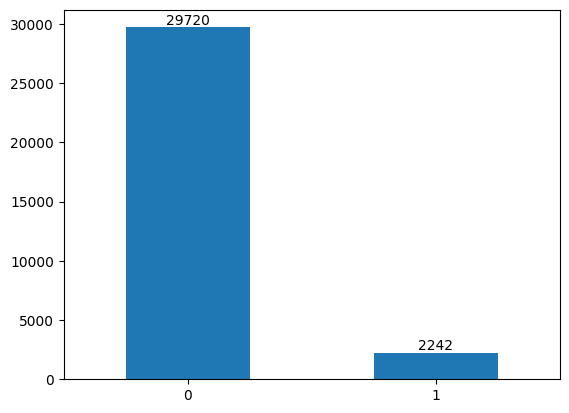

In [13]:
# Ploting the data for distribution
fgg = train['label'].value_counts().plot.bar()
fgg.bar_label(fgg.containers[0])
plt.xticks(rotation=0)
plt.show()

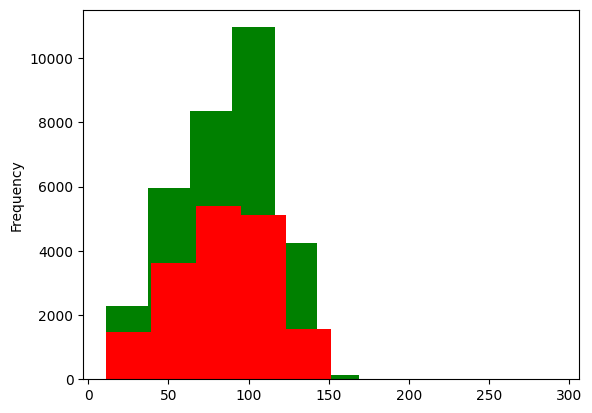

In [14]:
# histogram for length of the tweets
len_train = train['tweet'].str.len().plot.hist(color='green')
len_test = test['tweet'].str.len().plot.hist(color='red')

In [15]:
# addding new column to capture the length
train['length'] = train['tweet'].str.len()
train.head()

,id,label,tweet,length
0,1,0,@user when a father is dysfunctional and is s...,102
1,2,0,@user @user thanks for #lyft credit i can't us...,122
2,3,0,bihday your majesty,21
3,4,0,#model i love u take with u all the time in ...,86
4,5,0,factsguide: society now #motivation,39


In [16]:
# stats
train.groupby('label')['length'].describe()

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
0,29720.0,84.328634,29.566484,11.0,62.0,88.0,107.0,274.0
1,2242.0,90.187779,27.375502,12.0,69.0,96.0,111.0,152.0


In [17]:
# 30 most frequently repeated words
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(train.tweet)

sum_words = words.sum(axis=0)

word_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
word_freq = sorted(word_freq, key=lambda x:x[1], reverse=True)

frequency = pd.DataFrame(word_freq, columns=['word', 'frequency'])
frequency.head()

,word,frequency
0,user,17577
1,love,2749
2,day,2311
3,amp,1776
4,happy,1686


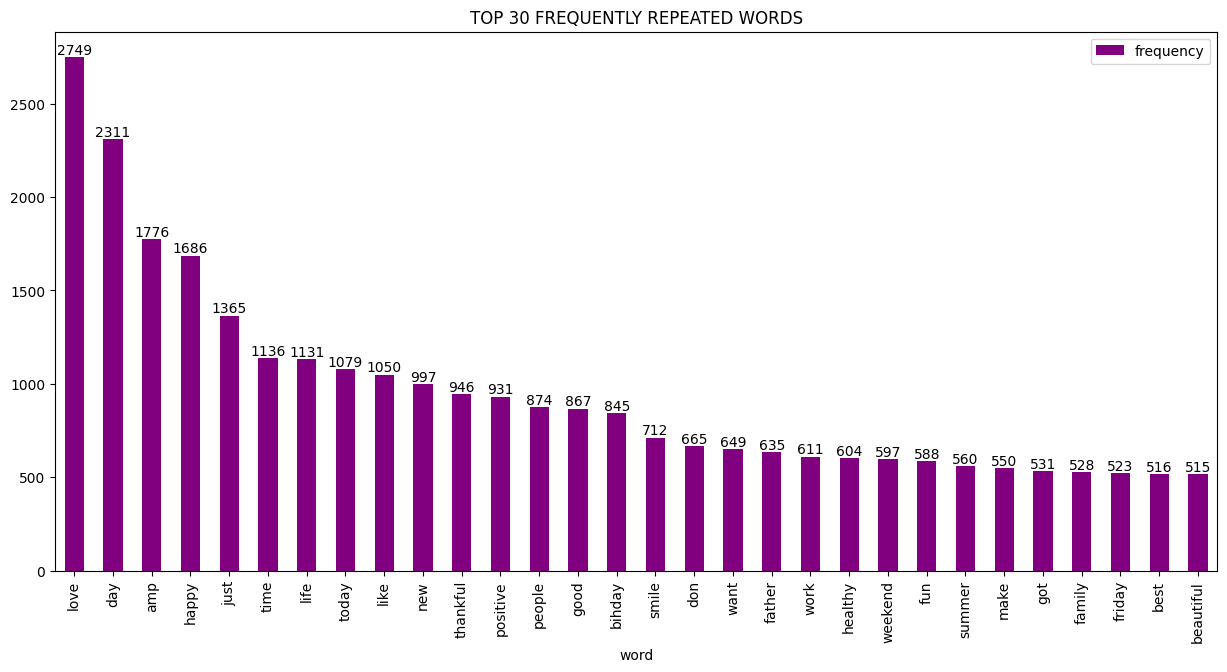

In [18]:
# Plotting the word frequency by excluding "user" because its PII data
freq_plot = frequency.loc[1:30].plot(x='word', y='frequency', kind='bar', figsize=(15,7),color='purple')
freq_plot.bar_label(freq_plot.containers[0])
plt.title('TOP 30 FREQUENTLY REPEATED WORDS')
plt.show()

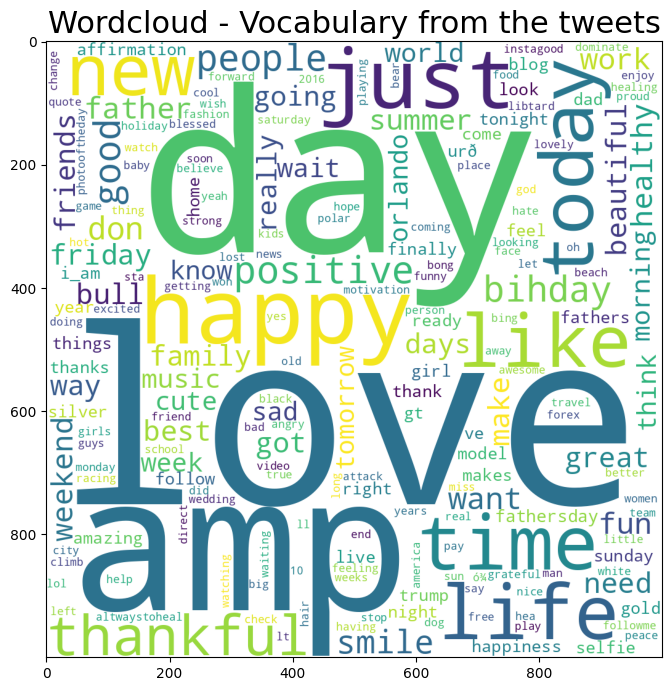

In [19]:
# Word cloud by excluding "user" as it is PII Data

from wordcloud import WordCloud

wc_plot = WordCloud(background_color='white', width=1000, height=1000).generate_from_frequencies(dict(word_freq[1:]))

plt.figure(figsize=(10,8))
plt.imshow(wc_plot)
plt.title('Wordcloud - Vocabulary from the tweets', fontsize=22)
plt.show()

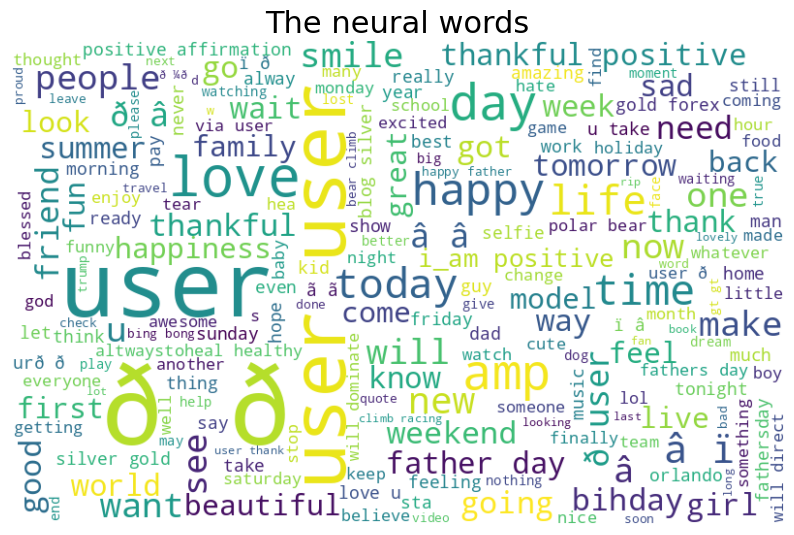

In [20]:
normal_words = ' '.join([text for text in train['tweet'][train['label']==0]])

nwc_plot = WordCloud(background_color='white', width=800, height=500, random_state=0, max_font_size=110).generate(normal_words)

plt.figure(figsize=(10,8))
plt.imshow(nwc_plot, interpolation='bilinear')
plt.title('The neural words', fontsize=22)
plt.axis('off')
plt.show()

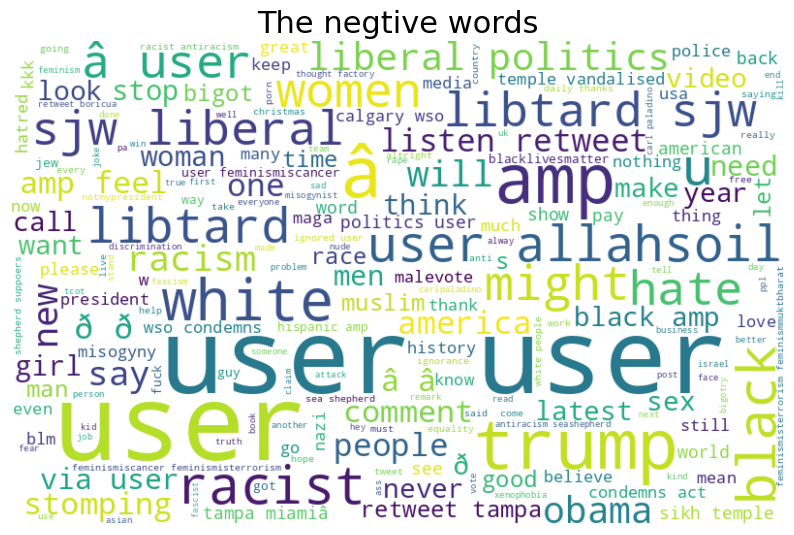

In [21]:
negative_words = ' '.join([text for text in train['tweet'][train['label']==1]])

ntwc_plot = WordCloud(background_color='white', width=800, height=500, random_state=0, max_font_size=110).generate(negative_words)

plt.figure(figsize=(10,8))
plt.imshow(ntwc_plot, interpolation='bilinear')
plt.title('The negtive words', fontsize=22)
plt.axis('off')
plt.show()

In [22]:
# function to collect hashtag

def hashtag_extract(x):
    hashtags = []
    import re

    for i in x:
        ht = re.findall(r'#(\w+)', i)
        hashtags.append(ht)

    return hashtags

In [23]:
# extracting hashtag from neutral tweets
ht_regular = hashtag_extract(train['tweet'][train['label']==0])

# extract hastag from negative tweets
ht_negative = hashtag_extract(train['tweet'][train['label']==1])

# unnesting the list
ht_regular = sum(ht_regular, [])
ht_negative = sum(ht_negative, [])

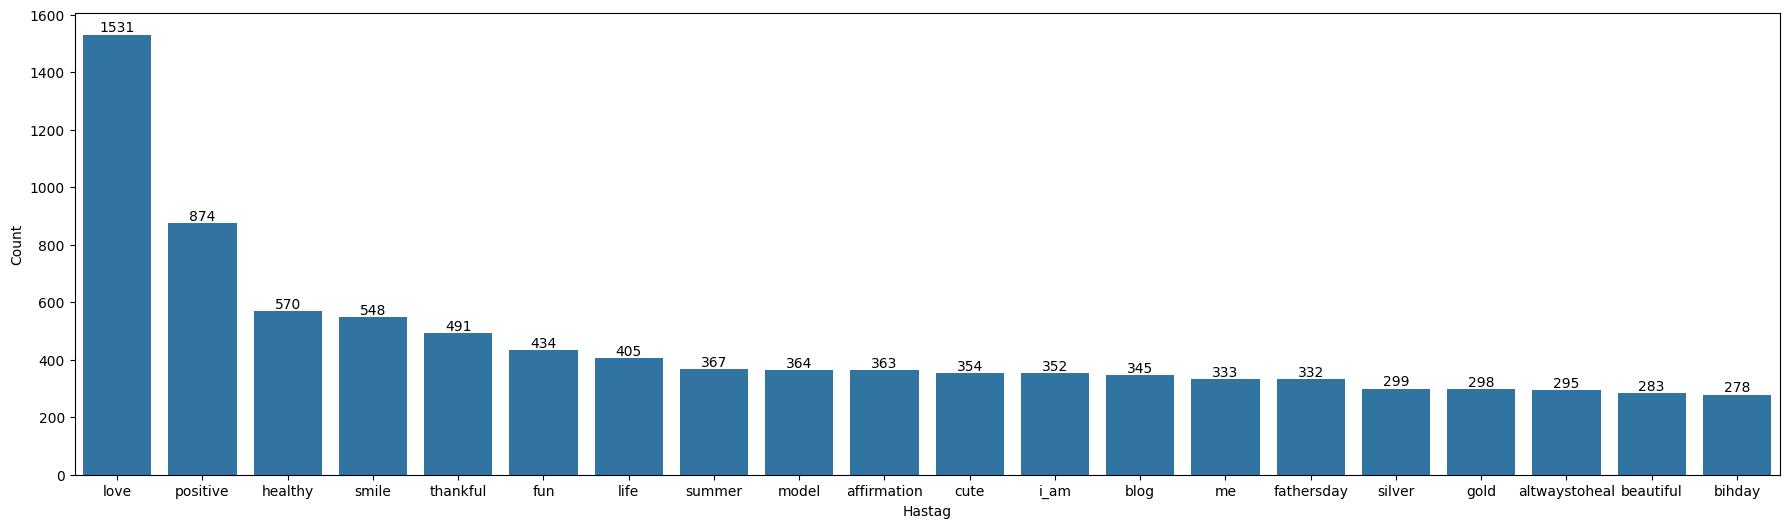

In [24]:
# neutral tweet hashtag
import nltk
a = nltk.FreqDist(ht_regular)
d = pd.DataFrame({'Hastag': list(a.keys()),
                  'Count': list(a.values())})

# top 20 neutral hastag
d = d.nlargest(columns='Count', n=20)
plt.figure(figsize=(22, 6))
ax = sns.barplot(data=d, x='Hastag', y='Count')
ax.set(ylabel='Count')
ax.bar_label(ax.containers[0])
plt.show()

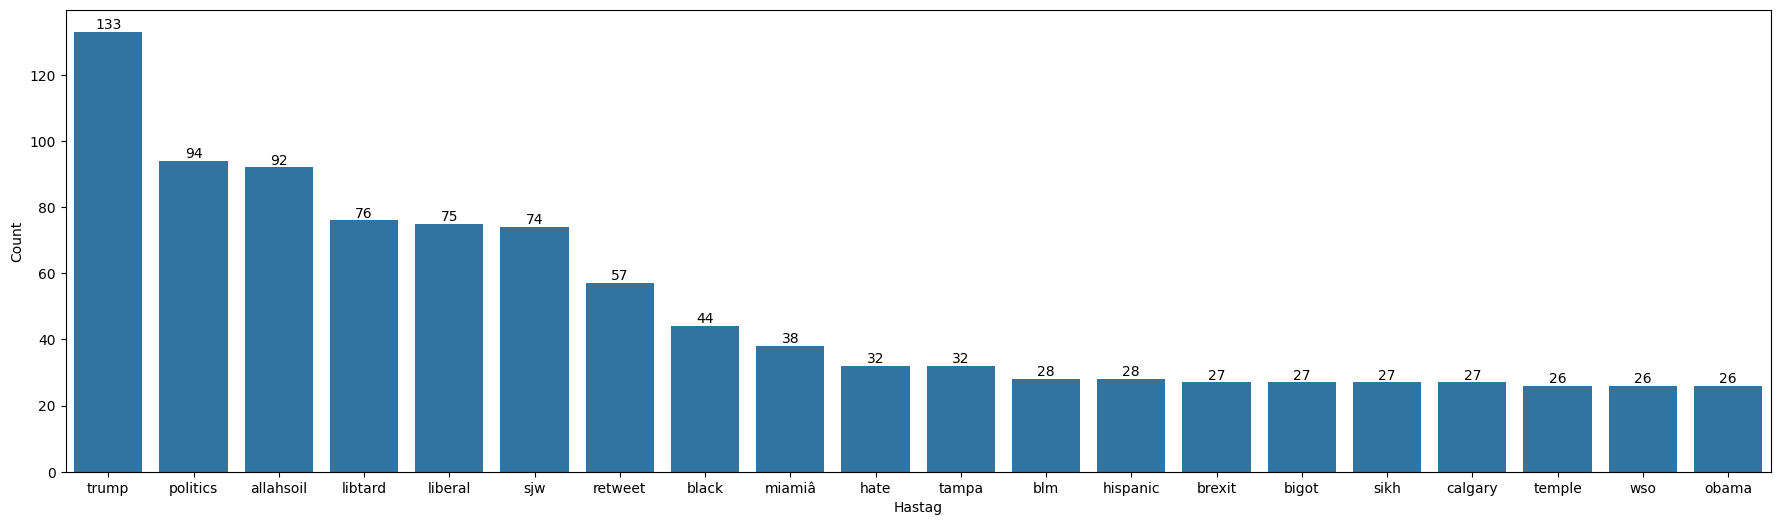

In [25]:
# negative tweet hashtag
import nltk
a = nltk.FreqDist(ht_negative)
d = pd.DataFrame({'Hastag': list(a.keys()),
                  'Count': list(a.values())})

# top 20 negative hastag
d = d.nlargest(columns='Count', n=20)
plt.figure(figsize=(22, 6))
ax = sns.barplot(data=d, x='Hastag', y='Count')
ax.set(ylabel='Count')
ax.bar_label(ax.containers[0])
plt.show()

In [26]:
# Tokenize the words in tweets
tokenized_tweet = train['tweet'].apply(lambda x: x.split())

# importing gensim
import gensim

# creating a word2vec model
word_w2v = gensim.models.Word2Vec(
                tokenized_tweet,
                vector_size = 200,      # desired number of feature
                window = 5,             # context window size
                sg = 1,
                hs = 0,
                negative = 10,          # negative sample size
                seed=42)

word_w2v.train(tokenized_tweet, total_examples=len(train['tweet']), epochs=20)

(5337861, 8411580)

In [27]:
word_w2v.wv.most_similar(positive='india')

[('semitic', 0.5492756366729736),
 ('palestinian', 0.5449414849281311),
 ('respected.', 0.5037756562232971),
 ('qualified', 0.5016522407531738),
 ('#raghuramrajan', 0.48753637075424194),
 ('reveal', 0.48420408368110657),
 ('90%', 0.4769732654094696),
 ('tht', 0.4769246578216553),
 ('delivered', 0.47423017024993896),
 ('colombia', 0.47416409850120544)]

In [28]:
word_w2v.wv.most_similar(negative='india')

[('please.', 0.09571892023086548),
 ('listen', 0.09462698549032211),
 ('#instalike', 0.0813770741224289),
 ('#relationshipgoals', 0.07733447104692459),
 ('#girlfriend', 0.07374042272567749),
 ('#sleep', 0.06785355508327484),
 ('#nightout', 0.06609155237674713),
 ('#blonde', 0.05612955242395401),
 ('#bored', 0.05226752161979675),
 ('#fml', 0.05193403735756874)]

In [31]:
# removing unwanted patterns from the data
import re
import nltk

nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [32]:
train_corpus = []

for i in range(0, len(train)):
    review = re.sub('[^a-zA-Z]', " ", train['tweet'][i])
    review = review.lower()
    review = review.split()

    ps = PorterStemmer()

    # stemming
    review = [ps.stem(word) for word in review if word not in set(stopwords.words('english'))]

    # joining back the words
    review = ' '.join(review)
    train_corpus.append(review)

In [34]:
test_corpus = []

for i in range(0, len(test)):
    review = re.sub('[^a-zA-Z]', " ", test['tweet'][i])
    review = review.lower()
    review = review.split()

    ps = PorterStemmer()

    # stemming
    review = [ps.stem(word) for word in review if word not in set(stopwords.words('english'))]

    # joining back the words
    review = ' '.join(review)
    test_corpus.append(review)

In [35]:
# bow for training data
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features=2500)
x = cv.fit_transform(train_corpus).toarray()
y = train.iloc[:, 1]

print(x.shape)
print(y.shape)

(31962, 2500)
(31962,)


In [36]:
# bow for test data
cv =  CountVectorizer(max_features=2500)
x_test = cv.fit_transform(test_corpus).toarray()

print(x_test.shape)

(17197, 2500)


In [38]:
# Splitting the data
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.3, random_state=42)

print(x_train.shape)
print(x_valid.shape)
print(y_train.shape)
print(y_valid.shape)

(22373, 2500)
(9589, 2500)
(22373,)
(9589,)


In [40]:
# Standardisation
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_valid = sc.transform(x_valid)
x_test = sc.transform(x_test)

In [41]:
# Random forest NLP model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, f1_score

model = RandomForestClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_valid)

print('training accuracy:', model.score(x_train, y_train))
print('testing accuracy:', model.score(x_valid, y_valid))

# metrics
print('F1 Score:', f1_score(y_valid, y_pred))
cm = confusion_matrix(y_valid, y_pred)
print(cm)

training accuracy: 0.9991060653466232
testing accuracy: 0.9490040671602878
F1 Score: 0.5901089689857503
[[8748  157]
 [ 332  352]]


In [42]:
# Decision tree
from sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier()
model_dt.fit(x_train, y_train)

y_pred_dt = model_dt.predict(x_valid)

print('training accuracy:', model_dt.score(x_train, y_train))
print('testing accuracy:', model_dt.score(x_valid, y_valid))

# metrics
print('F1 Score:', f1_score(y_valid, y_pred_dt))
cm = confusion_matrix(y_valid, y_pred_dt)
print(cm)

training accuracy: 0.999150762079292
testing accuracy: 0.9272082594639691
F1 Score: 0.5125698324022346
[[8524  381]
 [ 317  367]]


In [43]:
# XGBoost
from xgboost import XGBClassifier

model_xgb = XGBClassifier()
model_xgb.fit(x_train, y_train)

y_pred_xgb = model_xgb.predict(x_valid)

print('training accuracy:', model_xgb.score(x_train, y_train))
print('testing accuracy:', model_xgb.score(x_valid, y_valid))

# metrics
print('F1 Score:', f1_score(y_valid, y_pred_xgb))
cm = confusion_matrix(y_valid, y_pred_xgb)
print(cm)

training accuracy: 0.9622312608948286
testing accuracy: 0.953175513609344
F1 Score: 0.5610948191593352
[[8853   52]
 [ 397  287]]


In [45]:
# SVC

from sklearn.svm import SVC

model_svc = SVC()
model_svc.fit(x_train, y_train)

y_pred_svc = model_svc.predict(x_valid)

print('training accuracy:', model_svc.score(x_train, y_train))
print('testing accuracy:', model_svc.score(x_valid, y_valid))

# metrics
print('F1 Score:', f1_score(y_valid, y_pred_svc))
cm = confusion_matrix(y_valid, y_pred_svc)
print(cm)

training accuracy: 0.9785455683189559
testing accuracy: 0.9512983627072688
F1 Score: 0.4994640943193998
[[8889   16]
 [ 451  233]]
